Name: Emir Alper Yildiz

ID: 201101004

Course: BIL570 /BIL470

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import sklearn.metrics as sklM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from dt import DecisionTreeClassifier

# Exploratory Data Analysis (EDA) for IRIS

In [2]:
dataset = pd.read_csv('Iris.csv')

<h3> DATASET SUMMARY!!

In [3]:
print("Info for dataset\n")
print(dataset.info())
print('='*30)

print("\nShape is: ", str(dataset.shape) + "\n")
print('='*30)

print("First five elements", end='')
display(dataset.head())
print('='*30)

print("\nNull values of table")
display(dataset.isnull().sum())
print('='*30)

print("\nGeneral info of dataset", end='')
display(dataset.describe())
print('='*30)

print("\nDuplicate values", end='')
dup_sum = dataset.duplicated().sum()
if(dup_sum == 0):
    print("\nThere is no duplicate values.")
else:
    display(dataset[dataset.duplicated()])
    display(dup_sum)

print('='*30)
print("\nFrequency of species:\n" + dataset['Species'].value_counts().to_string())

Info for dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB
None

Shape is:  (150, 6)

First five elements

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0



Null values of table


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


General info of dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000



Duplicate values
There is no duplicate values.

Frequency of species:
0    50
1    50
2    50


<h3> DATASET CORRELATION MATRIX WITH SPECIES

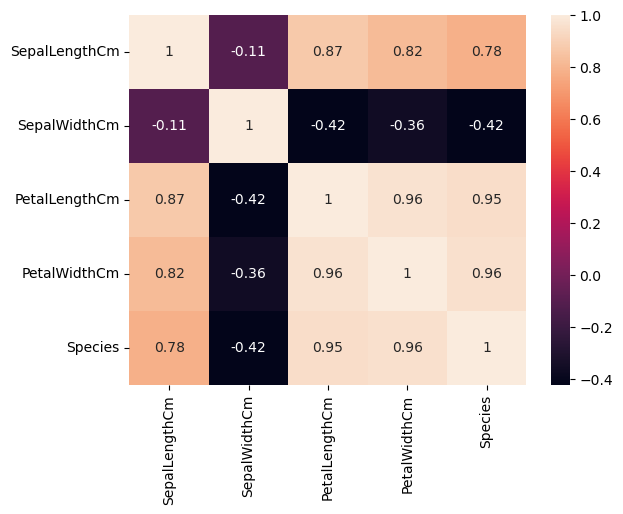

In [4]:
dataset_copy = dataset.drop('Id', axis=1)  #removing id column
corr_matrix = dataset_copy.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<h3> DATASET PAIR-PLOTS FOR FEATURES

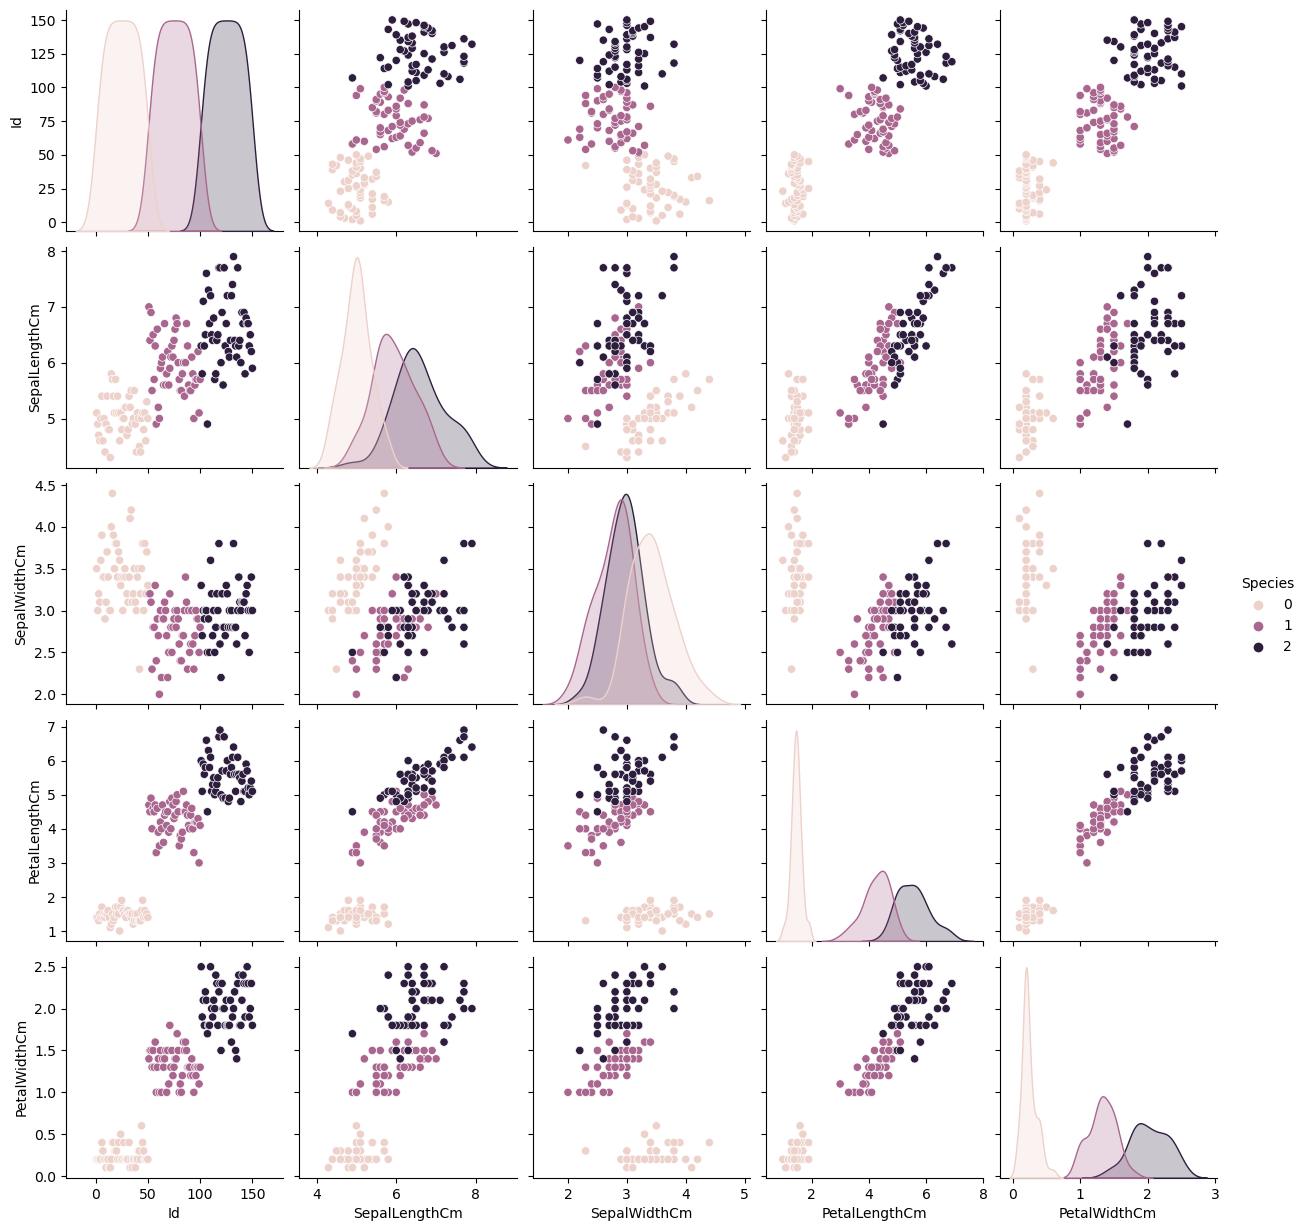

In [5]:
sns.pairplot(dataset, hue="Species")

# Train the classifier

In [6]:
clf = DecisionTreeClassifier(max_depth=5)

Remove id column

In [7]:
dataset = dataset.drop('Id', axis=1)

Split dataset to train and test

In [8]:
features=dataset.values.tolist();
targets=[];
for row in features:
    targets.append(int(row[4]));
    del row[4];
features=pd.Series(features);
targets=pd.Series(targets);
feature_train, feature_test, target_train, target_test = train_test_split(features, targets, test_size=0.2, shuffle=True);

feature_train_list=feature_train.values.tolist();
target_train_list=target_train.values.tolist();
feature_test_list=feature_test.values.tolist();
target_test_list=target_test.values.tolist();

### Train The Classifier

In [9]:
clf.fit(feature_train_list,target_train_list);

### Predict Class of Test values

In [10]:
target_predictions = clf.predict(feature_test_list)
print("Test Features Expected Classification")
print(target_test_list)
print("Prediction")
print(target_predictions);
check_predictions = clf.predict(feature_train_list)
print("Train Features Expected Classification")
print(target_train_list)
print("Prediction")
print(check_predictions);

Test Features Expected Classification
[1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0]
Prediction
[1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0]
Train Features Expected Classification
[1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2]
Prediction
[1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 

# Results

### Confusion Matrix of Test

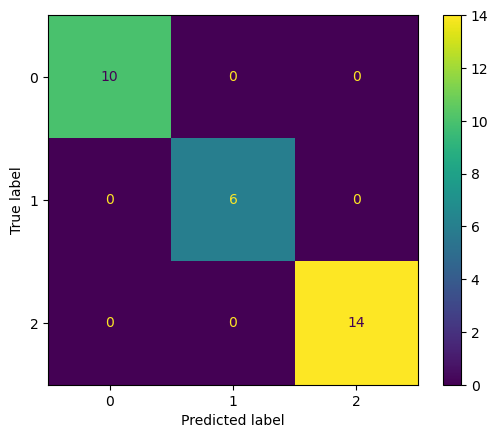

In [11]:
conf_matrix = sklM.confusion_matrix(target_test_list, target_predictions)
vis = sklM.ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.show()

### Confusion Matrix of Train

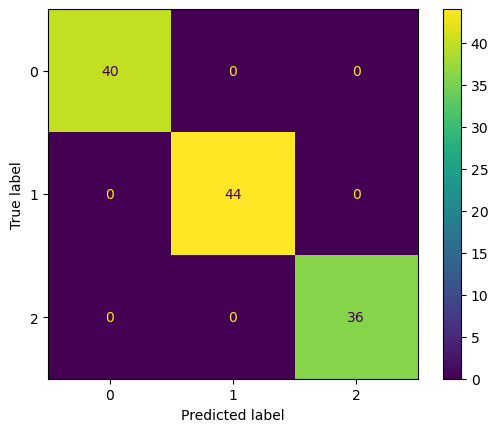

In [12]:
conf_matrix = sklM.confusion_matrix(target_train_list, check_predictions)
vis = sklM.ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.show()

### F1-Score

<h4>F1-Score of Test Data

In [13]:
print("Micro version:")
print(sklM.f1_score(target_test_list, target_predictions, average="micro"))

print("Macro version:")
print(sklM.f1_score(target_test_list, target_predictions, average="macro"))

print("Weighted version:")
print(sklM.f1_score(target_test_list, target_predictions, average="weighted"))

Micro version:
1.0
Macro version:
1.0
Weighted version:
1.0


<h4>F1-Score of Training Data

In [14]:
print("Micro version:")
print(sklM.f1_score(target_train_list, check_predictions, average="micro"))

print("Macro version:")
print(sklM.f1_score(target_train_list, check_predictions, average="macro"))

print("Weighted version:")
print(sklM.f1_score(target_train_list, check_predictions, average="weighted"))

Micro version:
1.0
Macro version:
1.0
Weighted version:
1.0


### Accuracy

<h4>Accuracy of Test Data

In [15]:
print("Accuracy: ", sklM.accuracy_score(target_test_list, target_predictions))

Accuracy:  1.0


<h4>Accuracy of Training Data

In [16]:
print("Accuracy: ", sklM.accuracy_score(target_train_list, check_predictions))

Accuracy:  1.0


### Precision

<h4>Precision of Test Data

In [17]:
print("Micro version:")
print(sklM.precision_score(target_test_list, target_predictions, average="micro"))

print("Macro version:")
print(sklM.precision_score(target_test_list, target_predictions, average="macro"))

print("Weighted version:")
print(sklM.precision_score(target_test_list, target_predictions, average="weighted"))

Micro version:
1.0
Macro version:
1.0
Weighted version:
1.0


<h4>Precision of Training Data

In [18]:
print("Micro version:")
print(sklM.precision_score(target_train_list, check_predictions, average="micro"))

print("Macro version:")
print(sklM.precision_score(target_train_list, check_predictions, average="macro"))

print("Weighted version:")
print(sklM.precision_score(target_train_list, check_predictions, average="weighted"))

Micro version:
1.0
Macro version:
1.0
Weighted version:
1.0


### Recall

<h4>Recall of Test Data

In [19]:
print("Micro version:")
print(sklM.recall_score(target_test_list, target_predictions, average="micro"))

print("Macro version:")
print(sklM.recall_score(target_test_list, target_predictions, average="macro"))

print("Weighted version:")
print(sklM.recall_score(target_test_list, target_predictions, average="weighted"))

Micro version:
1.0
Macro version:
1.0
Weighted version:
1.0


<h4>Recall of Training Data

In [20]:
print("Micro version:")
print(sklM.recall_score(target_train_list, check_predictions, average="micro"))

print("Macro version:")
print(sklM.recall_score(target_train_list, check_predictions, average="macro"))

print("Weighted version:")
print(sklM.recall_score(target_train_list, check_predictions, average="weighted"))

Micro version:
1.0
Macro version:
1.0
Weighted version:
1.0


### Plot of ROC Curve (Test/Train) and Value of AUC (Test/Train)

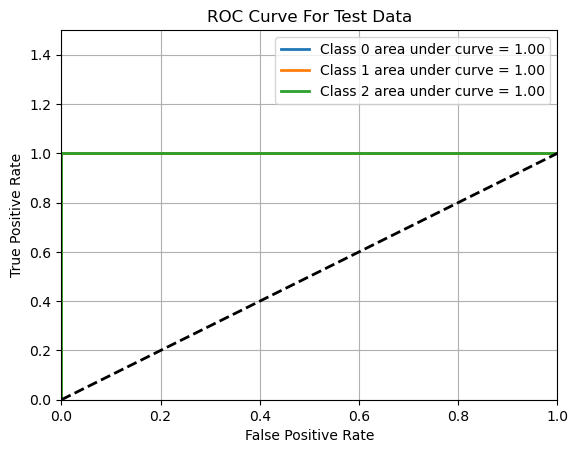

In [21]:
class_labels = [0, 1, 2]

target_bin_test, target_bin_predictions = [label_binarize(data, classes = class_labels) for data in [target_test_list, target_predictions]]


fpr_test = {}
tpr_test = {}

for i in class_labels:
    fpr_test[i], tpr_test[i], _ = sklM.roc_curve(target_bin_test[:, i], target_bin_predictions[:, i])

area_under_curve_test = [sklM.auc(fpr_test[i], tpr_test[i]) for i in class_labels]


for i in class_labels:
    color = plt.cm.tab10(i)
    label = f"Class {i} area under curve = {area_under_curve_test[i]:.2f}"
    plt.plot(fpr_test[i], tpr_test[i], color = color, lw = 2, label = label)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.5])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve For Test Data")
plt.legend()
plt.show()

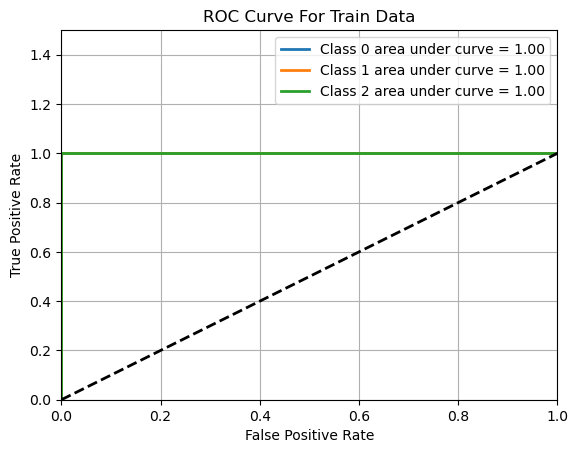

In [22]:
target_bin_train, target_bin_check = [label_binarize(data, classes = class_labels) for data in [target_train_list, check_predictions]]


fpr_train = {}
tpr_train = {}

for i in class_labels:
    fpr_train[i], tpr_train[i], _ = sklM.roc_curve(target_bin_train[:, i], target_bin_check[:, i])

area_under_curve_train = [sklM.auc(fpr_train[i], tpr_train[i]) for i in class_labels]


for i in class_labels:
    color = plt.cm.tab10(i)
    label = f"Class {i} area under curve = {area_under_curve_train[i]:.2f}"
    plt.plot(fpr_train[i], tpr_train[i], color = color, lw = 2, label = label)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.5])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve For Train Data")
plt.legend()
plt.show()

<h3>Analyze Of Results</h3>
<p>
&emsp;The model successfuly predict species of the flowers. It has %100 percent success rate with training data. Model's success rate is over %90 for test data most of the time.</br>
&emsp;The unexpected low success rate results may be caused by overfitting. But, for the maximum depth 5, generally high success rates are observed.</br>
&emsp;For training the model. I have used gini impurity. To find the optimal split of that node, I have checked every possible value of every feature. This has big time complexity but since the dataset is small, it does not cause any trouble for time. And it ensure the best split for that node.</br>
</p>

#### Ideal Depth for DT

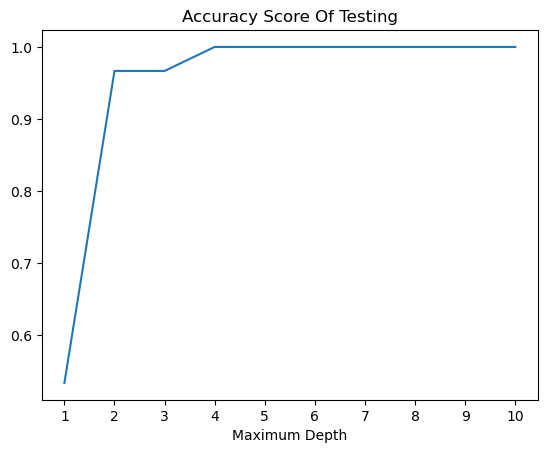

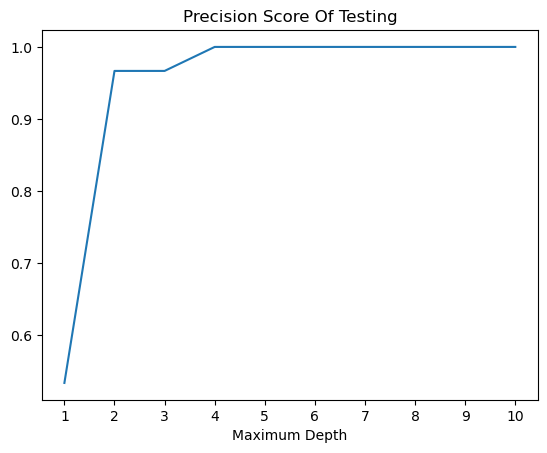

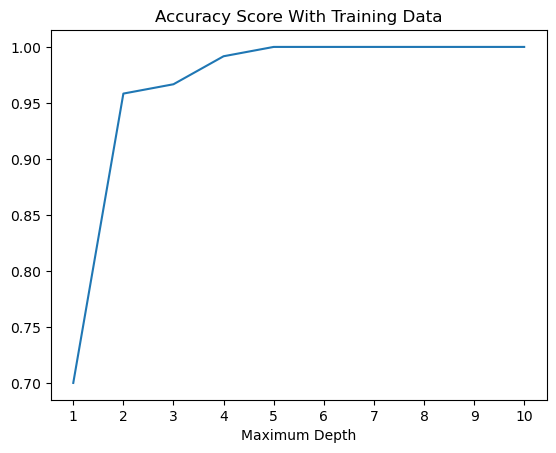

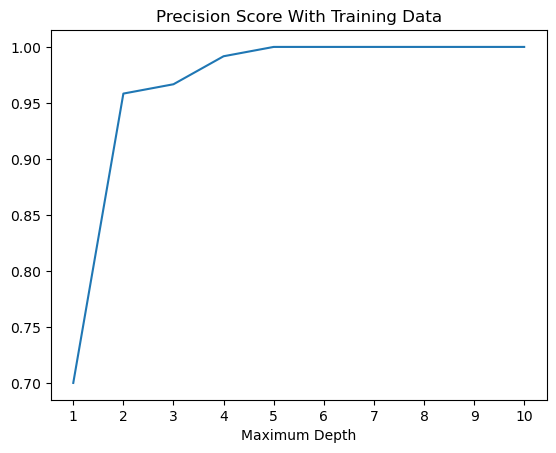

In [23]:
accuracy_score_of_predictions = []
accuracy_score_of_check = []
precision_score_of_predictions = []
precision_score_of_check = []

L = [1,2,3,4,5,6,7,8,9,10]
for i in L:
    clf2 = DecisionTreeClassifier(max_depth=i)
    clf2.fit(feature_train_list,target_train_list);
    target_predictions = clf2.predict(feature_test_list)
    check_predictions = clf2.predict(feature_train_list)
    
    accuracy_score_of_predictions.append(sklM.accuracy_score(target_test_list, target_predictions))
    precision_score_of_predictions.append(sklM.precision_score(target_test_list, target_predictions, average="micro"))
    
    accuracy_score_of_check.append(sklM.accuracy_score(target_train_list, check_predictions))
    precision_score_of_check.append(sklM.precision_score(target_train_list, check_predictions, average="micro"))

plt.plot(L, accuracy_score_of_predictions)
plt.xticks(L)
plt.xlabel("Maximum Depth")
plt.title("Accuracy Score Of Testing")
plt.show()

plt.plot(L, precision_score_of_predictions)
plt.xticks(L)
plt.xlabel("Maximum Depth")
plt.title("Precision Score Of Testing")
plt.show()

plt.plot(L, accuracy_score_of_check)
plt.xticks(L)
plt.xlabel("Maximum Depth")
plt.title("Accuracy Score With Training Data")
plt.show()

plt.plot(L, precision_score_of_check)
plt.xticks(L)
plt.xlabel("Maximum Depth")
plt.title("Precision Score With Training Data")
plt.show()

<h3>Analyze Of Results</h3>
<p>
&emsp;For depths below 2, result of fit function is expectedly bad. It has very low success rate both for test and training data.</br>
&emsp;From 2 to 5, maximum depth has overall good results. Model cannot reach %100 percent success rate for training data. But, test data have very promising success rate.</br>
&emsp;For maximum depth bigger than 5, we have risk of overfitting. It depends shuffle of original data but sometimes, success rate is dropping for test data. On the other hand, we reach %100 success rate for training date which is expected, but not the aim.</br>
&emsp;To reach maximum success rate, we can train five different models with the equally divided to 5 and shuffled data which 5 different pieces will be 5 different test data for one of the models.</br>
</p>